In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.16.5
pandas 0.25.2
sklearn 0.21.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
# print(fashion_mnist)
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]
# 打印格式
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


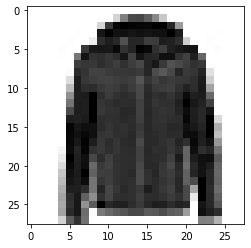

In [4]:
# 显示图片示例
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap='binary')
    plt.show()

show_single_image(x_train[0])

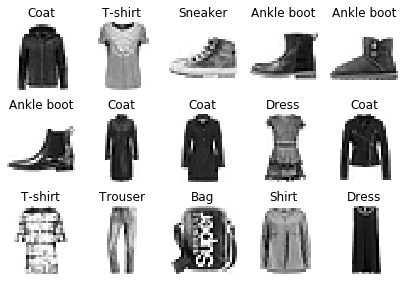

In [5]:
# 显示多张图片
def show_imgs(n_rows,n_cols,x_data,y_data,class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4,n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols*row + col
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap="binary",interpolation = 'nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()
    
class_names = ['T-shirt','Trouser','pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

show_imgs(3,5,x_train,y_train,class_names)

In [18]:
# tf.keras.models.Sequential()
# 构建模型

# 创建对象
"""model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='sigmoid'))
model.add(keras.layers.Dense(100,activation='sigmoid'))
model.add(keras.layers.Dense(10,activation='softmax'))"""

# 另一种写法
model = keras.modells.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='sigmoid'),
    keras.layers.Dense(100,activation='sigmoid'),
    keras.layers.Dense(10,activation='softmax')
])

# 
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])


In [19]:
model.layers

In [20]:
# 概况
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 开始训练
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 81us/sample - loss: 1.1606 - accuracy: 0.6855 - val_loss: 0.7509 - val_accuracy: 0.7696
Epoch 2/10
55000/55000 [==============================] - 4s 75us/sample - loss: 0.6772 - accuracy: 0.7758 - val_loss: 0.6105 - val_accuracy: 0.7934
Epoch 3/10
55000/55000 [==============================] - 4s 75us/sample - loss: 0.5940 - accuracy: 0.7985 - val_loss: 0.5726 - val_accuracy: 0.8054
Epoch 4/10
55000/55000 [==============================] - 4s 75us/sample - loss: 0.5683 - accuracy: 0.8060 - val_loss: 0.5350 - val_accuracy: 0.8250
Epoch 5/10
55000/55000 [==============================] - 4s 76us/sample - loss: 0.5513 - accuracy: 0.8093 - val_loss: 0.5251 - val_accuracy: 0.8244
Epoch 6/10
55000/55000 [==============================] - 4s 73us/sample - loss: 0.5434 - accuracy: 0.8132 - val_loss: 0.5408 - val_accuracy: 0.8216
Epoch 7/10
55000/55000 [==============================] -

In [22]:
type(history)

tensorflow.python.keras.callbacks.History

In [26]:
history.history

{'loss': [1.1606243862412193,
  0.6772221897992221,
  0.593950007984855,
  0.5682853937582536,
  0.5513157244638963,
  0.5434476194555109,
  0.5429410968347029,
  0.5476582593831149,
  0.5443412793853066,
  0.5491626829017292],
 'accuracy': [0.68552727,
  0.77581817,
  0.7984545,
  0.8060182,
  0.80932724,
  0.81316364,
  0.81218183,
  0.8123091,
  0.81258184,
  0.81112725],
 'val_loss': [0.7509308515548706,
  0.6104918981552124,
  0.5725741407871247,
  0.5349629381179809,
  0.5251054173469544,
  0.5407776864051819,
  0.5372429446220398,
  0.5283721379280091,
  0.5371524212360382,
  0.5633715375423431],
 'val_accuracy': [0.7696,
  0.7934,
  0.8054,
  0.825,
  0.8244,
  0.8216,
  0.8184,
  0.8164,
  0.8194,
  0.8018]}

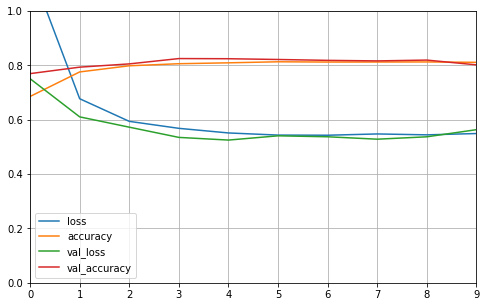

In [24]:
# 画图
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)